Detail Perhitungan:
Aturan: IF Demand Turun AND Stock Sedikit THEN Production Bertambah
  - Fuzzy Demand: 0.25
  - Fuzzy Stock: 0.78
  - Fuzzy Output (Min): 0.25
  - Defuzzifikasi: 3500.00
Aturan: IF Demand Turun AND Stock Sedang THEN Production Berkurang
  - Fuzzy Demand: 0.25
  - Fuzzy Stock: 0.44
  - Fuzzy Output (Min): 0.25
  - Defuzzifikasi: 6500.00
Aturan: IF Demand Turun AND Stock Banyak THEN Production Berkurang
  - Fuzzy Demand: 0.25
  - Fuzzy Stock: 0.22
  - Fuzzy Output (Min): 0.22
  - Defuzzifikasi: 6666.67
Aturan: IF Demand Tetap AND Stock Sedikit THEN Production Bertambah
  - Fuzzy Demand: 0.50
  - Fuzzy Stock: 0.78
  - Fuzzy Output (Min): 0.50
  - Defuzzifikasi: 5000.00
Aturan: IF Demand Tetap AND Stock Sedang THEN Production Berkurang
  - Fuzzy Demand: 0.50
  - Fuzzy Stock: 0.44
  - Fuzzy Output (Min): 0.44
  - Defuzzifikasi: 5333.33
Aturan: IF Demand Tetap AND Stock Banyak THEN Production Berkurang
  - Fuzzy Demand: 0.50
  - Fuzzy Stock: 0.22
  - Fuzzy Output (Min): 0.

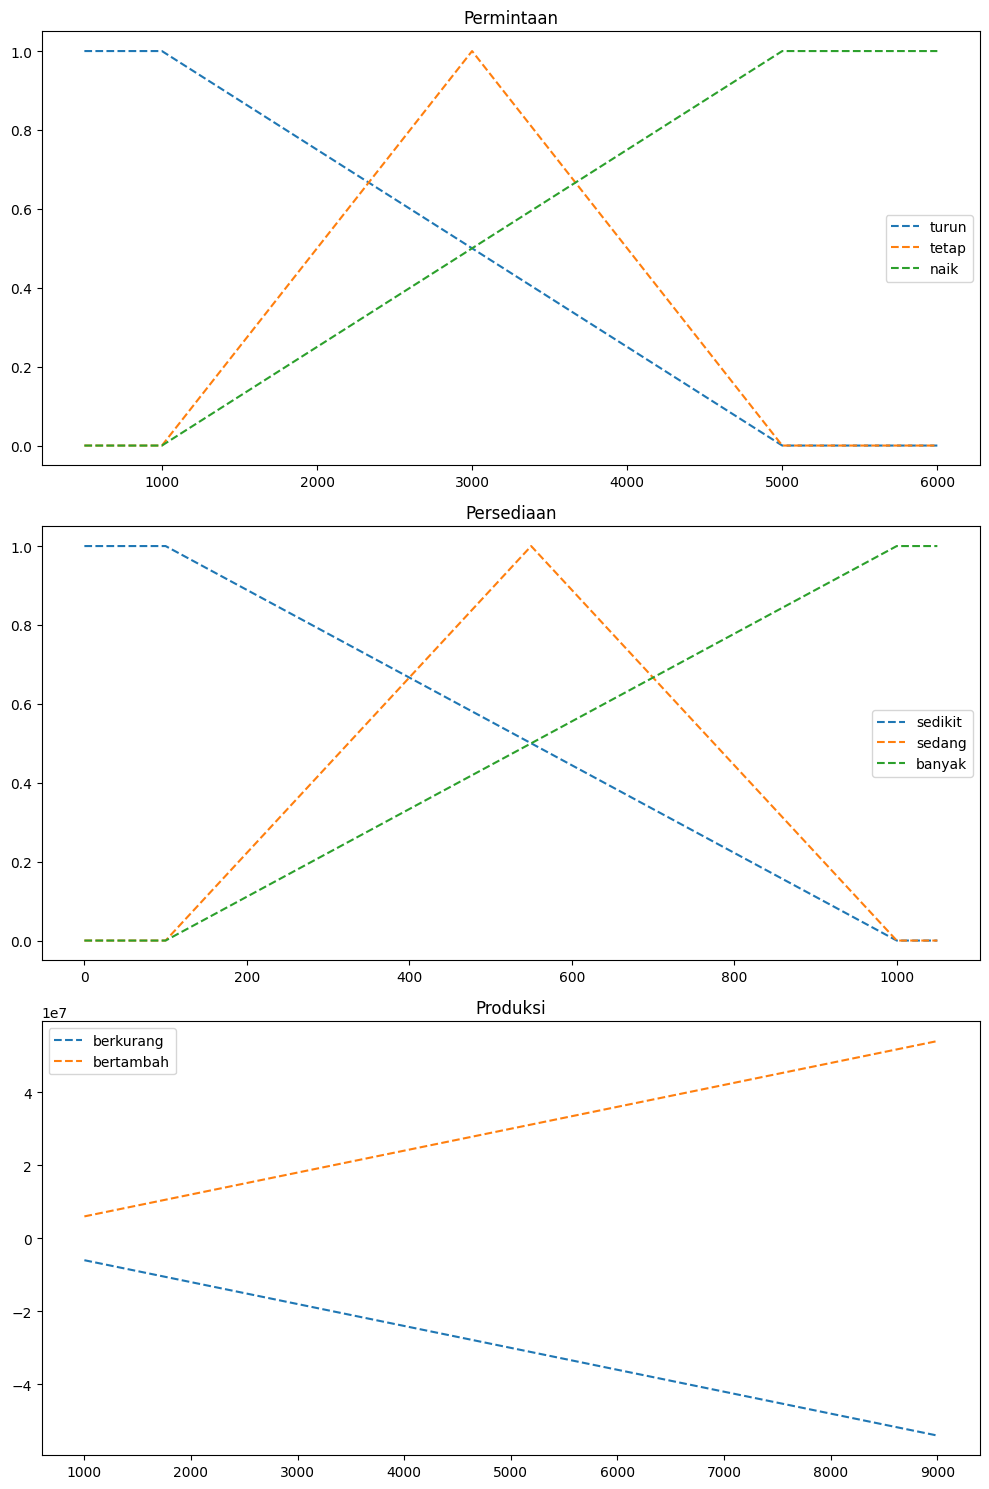

In [10]:
import matplotlib.pyplot as plt

class Fuzzy:
    def __init__(self):
        self.max = 0
        self.min = 0

    def down(self, x):
        return max(0, (self.max - x) / (self.max - self.min))

    def up(self, x):
        return max(0, (x - self.min) / (self.max - self.min))

    def rev_down(self, value):
        return self.max - value * (self.max - self.min)

    def rev_up(self, value):
        return value * (self.max - self.min) + self.min

class Demand(Fuzzy):
    def __init__(self):
        self.min = 1000
        self.max = 5000

    def turun(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def tetap(self, x):
        mid = (self.min + self.max) / 2
        if x < self.min or x > self.max:
            return 0
        if x == mid:
            return 1
        return 1 - abs(x - mid) / (mid - self.min)

    def naik(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)

class Stock(Fuzzy):
    def __init__(self):
        self.min = 100
        self.max = 1000

    def sedikit(self, x):
        if x < self.min:
            return 1
        if x > self.max:
            return 0
        return self.down(x)

    def sedang(self, x):
        mid = (self.min + self.max) / 2
        if x < self.min or x > self.max:
            return 0
        if x == mid:
            return 1
        return 1 - abs(x - mid) / (mid - self.min)

    def banyak(self, x):
        if x < self.min:
            return 0
        if x > self.max:
            return 1
        return self.up(x)

class Production(Fuzzy):
    def __init__(self):
        self.min = 2000
        self.max = 8000

    def berkurang(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def bertambah(self, fuzzy_value):
        return self.rev_up(fuzzy_value)

# Rule map sesuai dengan aturan
rule_map = {
    ("turun", "sedikit"): "bertambah",
    ("turun", "sedang"): "berkurang",
    ("turun", "banyak"): "berkurang",
    ("tetap", "sedikit"): "bertambah",
    ("tetap", "sedang"): "berkurang",
    ("tetap", "banyak"): "berkurang",
    ("naik", "sedikit"): "bertambah",
    ("naik", "sedang"): "bertambah",
    ("naik", "banyak"): "berkurang",
}

def fuzzy_production_inference(x_demand, x_stock):
    fuzzy_real = 0
    fuzzy = 0

    print("Detail Perhitungan:")
    for k, v in rule_map.items():
        demand = Demand()
        stock = Stock()
        prod = Production()

        # Hitung nilai fuzzy untuk demand dan stock
        demand_value = getattr(demand, k[0])(x_demand)
        stock_value = getattr(stock, k[1])(x_stock)

        # Agregasi dengan metode minimum
        prod_value = min(demand_value, stock_value)

        # Defuzzifikasi
        x_prod = getattr(prod, v)(prod_value)

        # Tampilkan detail perhitungan untuk setiap aturan
        print(f"Aturan: IF Demand {k[0].capitalize()} AND Stock {k[1].capitalize()} THEN Production {v.capitalize()}")
        print(f"  - Fuzzy Demand: {demand_value:.2f}")
        print(f"  - Fuzzy Stock: {stock_value:.2f}")
        print(f"  - Fuzzy Output (Min): {prod_value:.2f}")
        print(f"  - Defuzzifikasi: {x_prod:.2f}")

        # Hitung centroid
        fuzzy_real += prod_value * x_prod
        fuzzy += prod_value

    # Hitung hasil akhir
    result = int(fuzzy_real / fuzzy) if fuzzy != 0 else 0
    print(f"\nHasil Defuzzifikasi (Centroid): {result}")
    return result

def plot_memberships():
    demand = Demand()
    stock = Stock()
    prod = Production()

    x_demand = range(500, 6001, 100)
    x_stock = range(0, 1100, 50)
    x_prod = range(1000, 9001, 100)

    plt.figure(figsize=(10, 15))

    # Plot demand
    plt.subplot(3, 1, 1)
    plt.plot(x_demand, [demand.turun(x) for x in x_demand], label="turun", linestyle="--")
    plt.plot(x_demand, [demand.tetap(x) for x in x_demand], label="tetap", linestyle="--")
    plt.plot(x_demand, [demand.naik(x) for x in x_demand], label="naik", linestyle="--")
    plt.title("Permintaan")
    plt.legend()

    # Plot stock
    plt.subplot(3, 1, 2)
    plt.plot(x_stock, [stock.sedikit(x) for x in x_stock], label="sedikit", linestyle="--")
    plt.plot(x_stock, [stock.sedang(x) for x in x_stock], label="sedang", linestyle="--")
    plt.plot(x_stock, [stock.banyak(x) for x in x_stock], label="banyak", linestyle="--")
    plt.title("Persediaan")
    plt.legend()

    # Plot production
    plt.subplot(3, 1, 3)
    plt.plot(x_prod, [prod.berkurang(x) for x in x_prod], label="berkurang", linestyle="--")
    plt.plot(x_prod, [prod.bertambah(x) for x in x_prod], label="bertambah", linestyle="--")
    plt.title("Produksi")
    plt.legend()

    plt.tight_layout()
    plt.show()

# test
x_demand = 4000
x_stock = 300
result = fuzzy_production_inference(x_demand, x_stock)
print(f"\nProduksi yang disarankan: {result}")

# Tampilkan grafik
plot_memberships()
